In [2]:
# import dependencies
import numpy as np
import pandas as pd
import random
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
import scipy.stats as stats

%matplotlib inline


In [3]:
# plots scatterplot relationship between two Series, returns linear regression
def scatter(ser1, ser2, reg=False):
    clrs = ['#4477aa', '#66ccee', '#228833', '#ccbb44', '#ee6677', '#aa3377', '#bbbbbb']

    index = np.random.randint(7)

    fig, ax = plt.subplots(figsize=(10,10))

    ax.scatter(ser1, ser2, color=clrs[index], edgecolor='k')

    ax.set_title(f"{ser1.name} vs. {ser2.name}")
    ax.set_xlabel(ser1.name)
    ax.set_ylabel(ser2.name)

    slope, intercept, rvalue, pvalue, stderr = stats.linregress(ser1, ser2)
    if reg == True:
        line = slope * ser1 + intercept
        ax.plot(ser1, line)

    plt.show()

    summary = {
        "slope" : slope,
        "intercept" : intercept,
        "rvalue" : rvalue,
        "pvalue" : pvalue,
        "stderr" : stderr
    }

    return summary

# takes 1000 random sample of size 1000, with replacement, and calculates each column mean
def sample(df, num=1000, size=1000):
    samp_list = []

    for i in range(num):
        samp_list.append(df.sample(n=size, replace=True).mean())

    return pd.DataFrame(samp_list)


In [4]:
# import csv
cali_housing_df = pd.read_csv("Resources/complete_housing_data.csv")
cali_housing_df = cali_housing_df.drop(columns="Unnamed: 0")
cali_housing_df = cali_housing_df.drop(columns=["ocean_proximity"])

cali_housing_df


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,county_name,total_crime_rate
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,Contra Costa,4.776461
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,Contra Costa,4.776461
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,Alameda,6.625693
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,Alameda,6.625693
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,Alameda,6.625693
...,...,...,...,...,...,...,...,...,...,...,...
20605,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,Yuba,5.778337
20606,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,Yuba,5.778337
20607,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,Yuba,5.778337
20608,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,Yuba,5.778337


In [26]:
cali_housing_df.county_name.value_counts()

Los Angeles        5901
San Diego          1606
Orange             1503
Santa Clara         977
Alameda             948
San Bernardino      795
Sacramento          713
Riverside           662
Contra Costa        659
San Mateo           647
Fresno              512
San Francisco       415
San Joaquin         413
Ventura             389
Kern                350
Sonoma              310
Stanislaus          304
Tulare              271
Santa Barbara       270
Monterey            209
Solano              200
Santa Cruz          186
San Luis Obispo     169
Marin               155
Butte               151
Merced              135
Placer              129
Humboldt            124
Shasta              121
Imperial            116
El Dorado           114
Napa                108
Kings                94
Lake                 87
Yuba                 85
Madera               83
Nevada               82
Mendocino            81
Yolo                 65
Tuolumne             58
Tehama               55
Siskiyou        

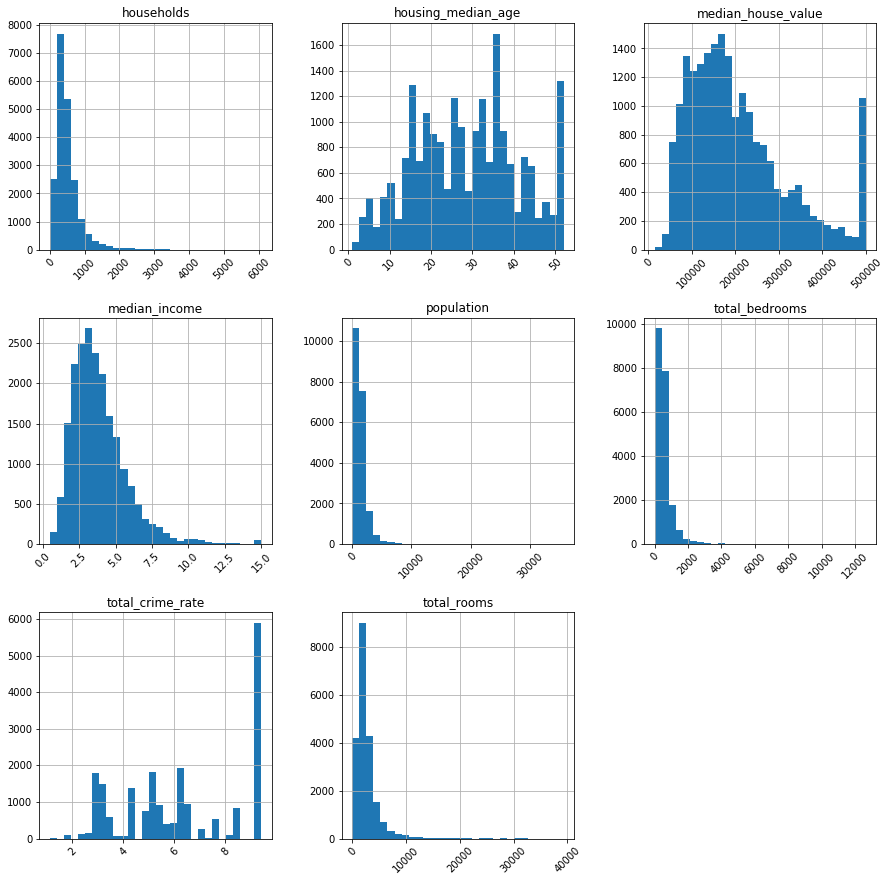

In [4]:
cols = cali_housing_df.columns.difference(["latitude", "longitude"])
numeric_df = cali_housing_df[cols]

numeric_df.hist(bins=30, figsize=(15,15), xrot=45)
plt.show()


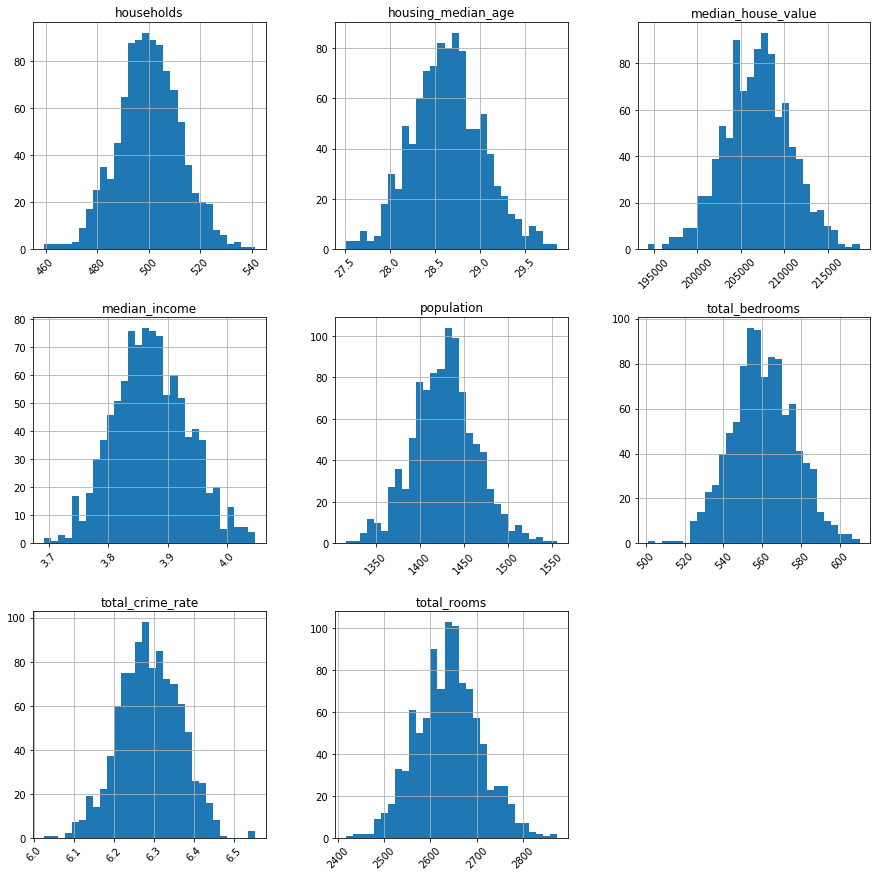

In [50]:
sample_df = sample(numeric_df, num=1000, size=1000)
sample_df.hist(bins=30, figsize=(15,15), xrot=45)
plt.show()


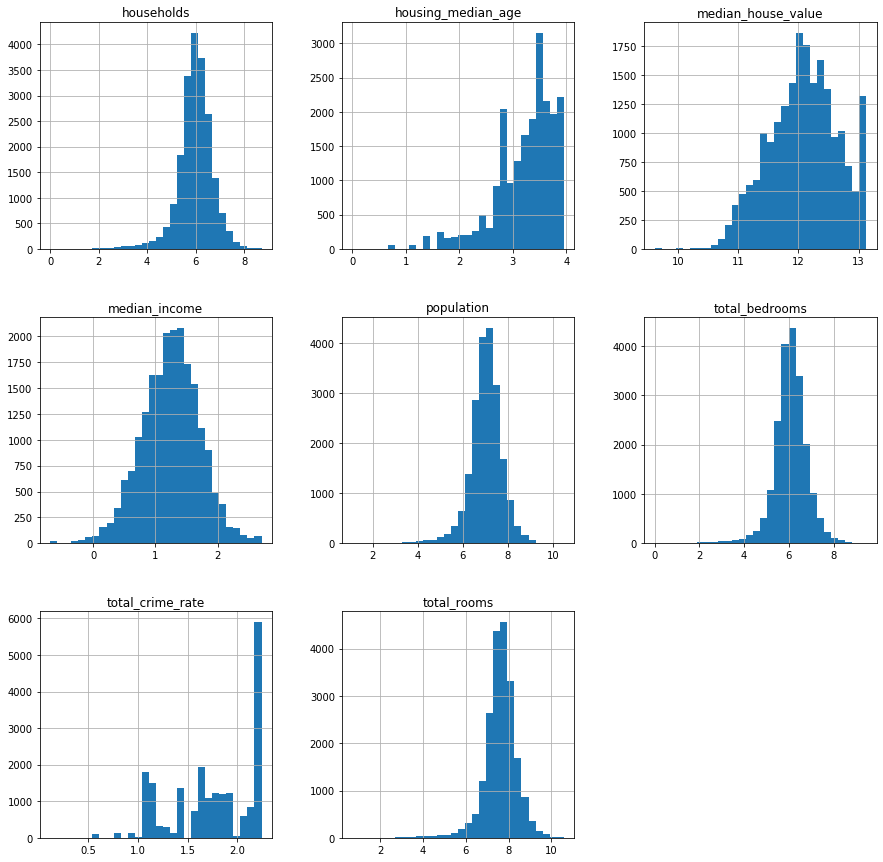

In [20]:
np.log(numeric_df).hist(bins=30, figsize=(15,15))
plt.show()

In [51]:
numeric_df.columns

Index(['households', 'housing_median_age', 'median_house_value',
       'median_income', 'population', 'total_bedrooms', 'total_crime_rate',
       'total_rooms'],
      dtype='object')

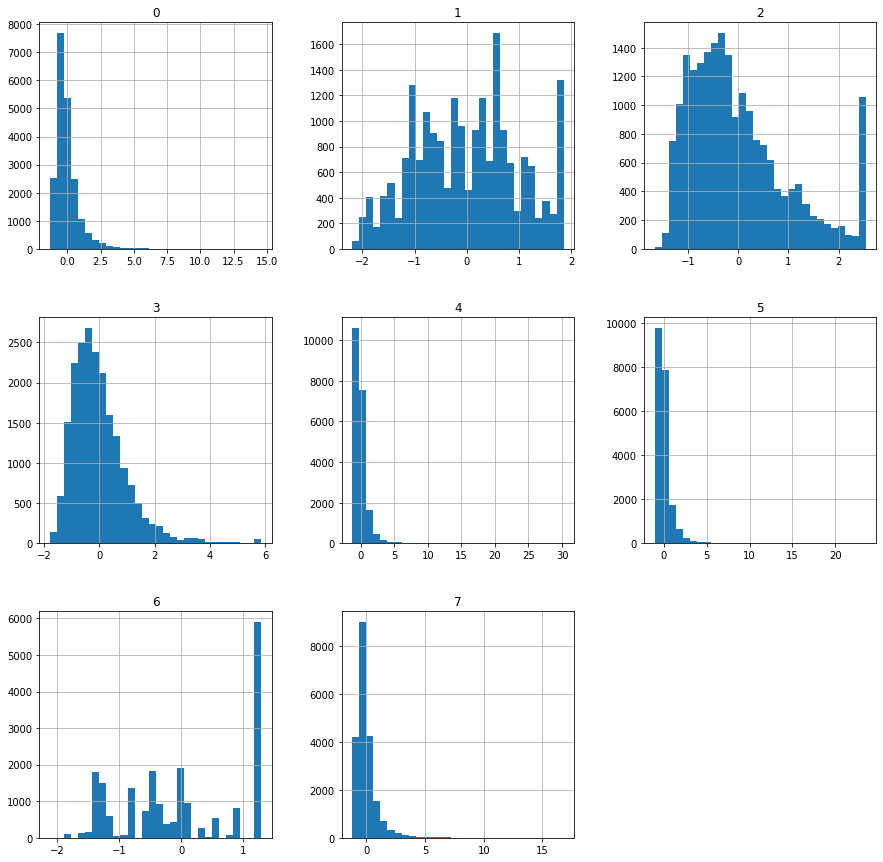

In [6]:
scaled_df = pd.DataFrame(preprocessing.scale(numeric_df))
scaled_df.hist(bins=30, figsize=(15,15))
plt.show()


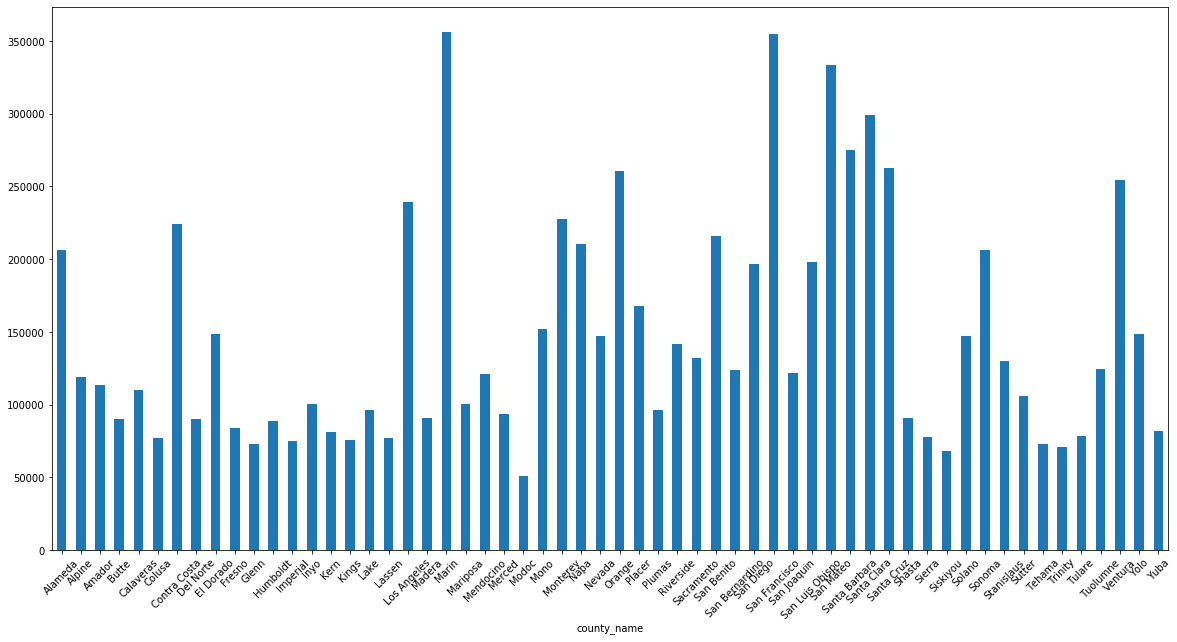

In [9]:
county_mean_value = cali_housing_df.groupby("county_name")["median_house_value"].mean()
county_mean_value.plot(kind='bar', figsize=(20,10), rot=45)
plt.show()


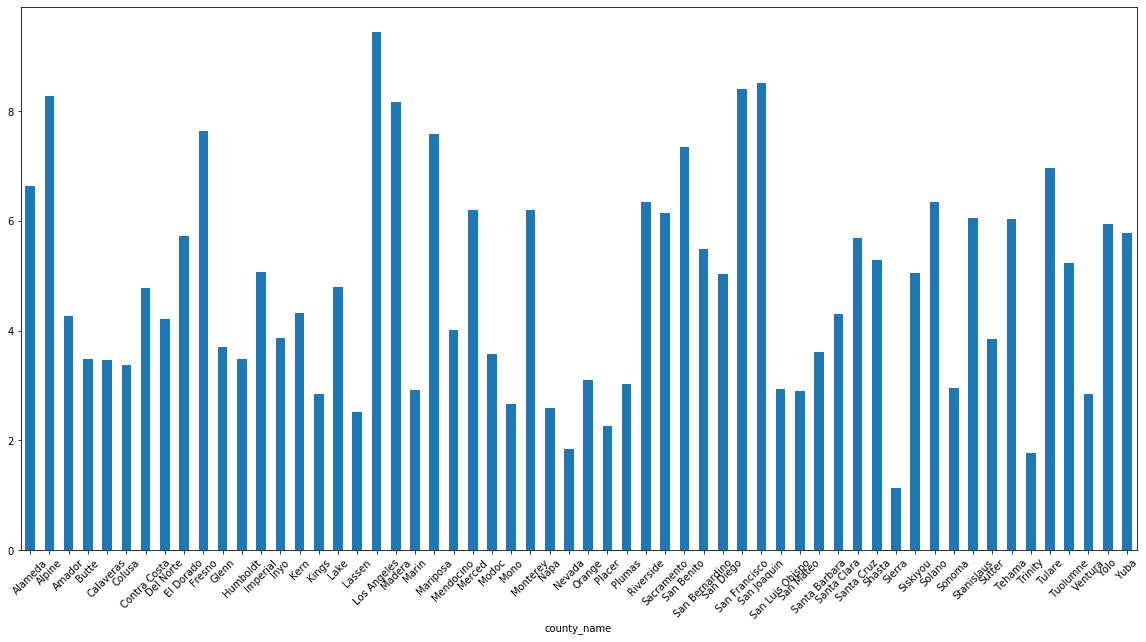

In [10]:
county_crime = cali_housing_df.groupby("county_name").total_crime_rate.mean()
county_crime.plot(kind='bar', figsize=(20,10), rot=45)
plt.show()


In [37]:
cali_housing_df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'county_name', 'total_crime_rate'],
      dtype='object')

In [5]:
county_mean_age = cali_housing_df.groupby("county_name").housing_median_age.mean()
county_mean_rooms = cali_housing_df.groupby("county_name").total_rooms.mean()
county_mean_bedrooms = cali_housing_df.groupby("county_name").total_bedrooms.mean()
county_mean_pop = cali_housing_df.groupby("county_name").population.mean()
county_mean_households = cali_housing_df.groupby("county_name").households.mean()
county_mean_income = cali_housing_df.groupby("county_name").median_income.mean()
county_mean_value = cali_housing_df.groupby("county_name").median_house_value.mean()
county_mean_crime = cali_housing_df.groupby("county_name").total_crime_rate.mean()


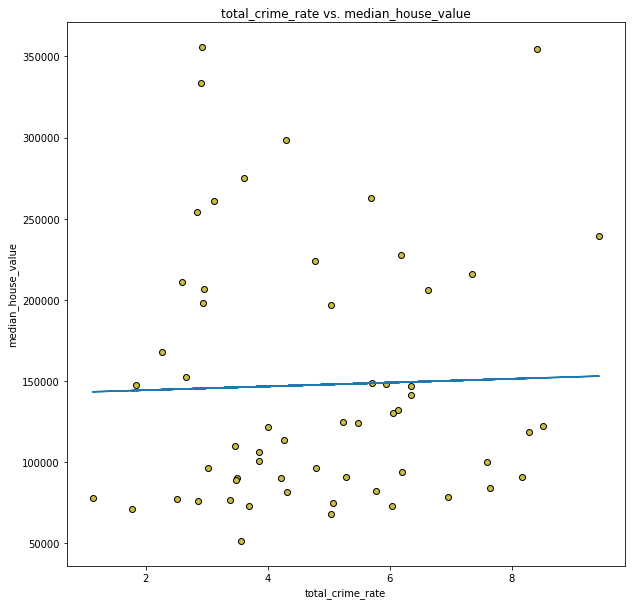

{'slope': 1165.2169578335468,
 'intercept': 141943.4929352029,
 'rvalue': 0.028875569010601097,
 'pvalue': 0.8296367770186361,
 'stderr': 5390.153080791109}

In [6]:
plot = scatter(county_mean_crime, county_mean_value, reg=True)
plot


total_rooms/median_income
median_income/median_house_value
rooms/population
crime/population?

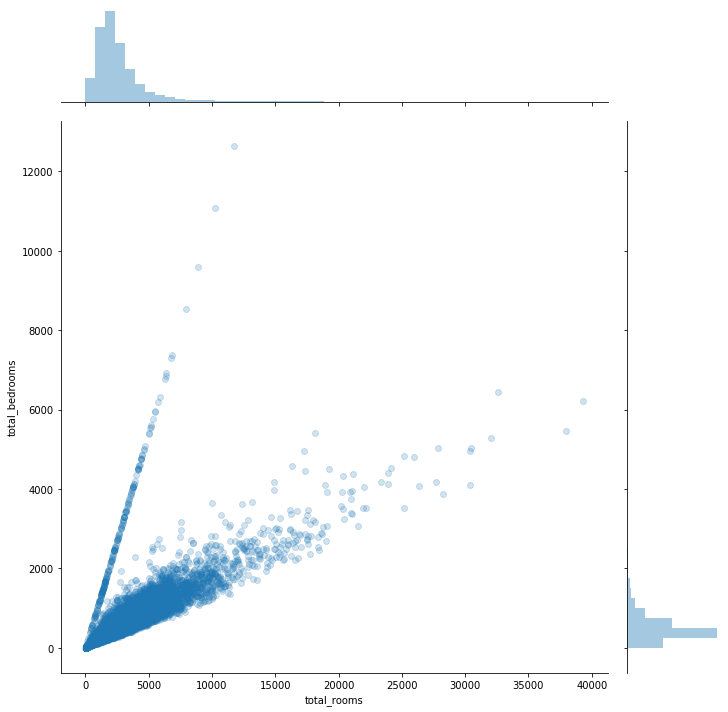

In [6]:
x_in = cali_housing_df.total_rooms
y_in = cali_housing_df.total_bedrooms
sns.jointplot(x_in, y_in, height=10, alpha=0.2)
plt.show()


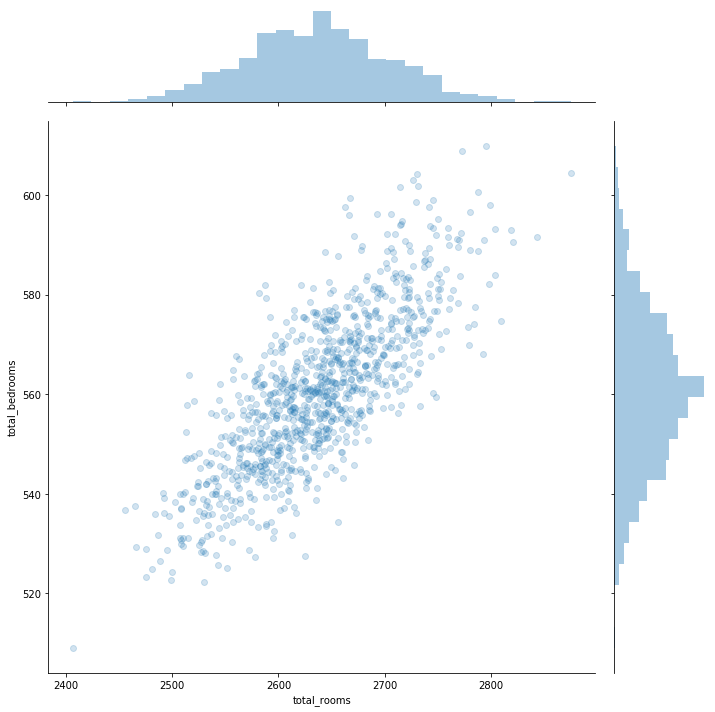

In [67]:
x_in = sample_df.total_rooms
y_in = sample_df.total_bedrooms
sns.jointplot(x_in, y_in, height=10, alpha=0.2)
plt.show()


In [9]:
sample_df


,households,housing_median_age,median_house_value,median_income,population,total_bedrooms,total_crime_rate,total_rooms
0,490.008,28.899,209620.852,3.926360,1389.623,534.356,6.345461,2574.006
1,513.643,28.576,210603.843,3.862471,1476.658,592.105,6.295470,2702.168
2,483.556,29.101,207040.541,3.864461,1352.293,531.036,6.398909,2510.220
3,521.053,28.299,202667.740,3.814106,1471.534,604.170,6.320707,2729.974
4,482.738,28.803,204177.243,3.865065,1378.589,543.491,6.373271,2570.198
...,...,...,...,...,...,...,...,...
995,494.043,28.142,206170.641,3.835139,1407.159,534.376,6.410084,2592.743
996,502.525,28.900,201953.544,3.817619,1443.460,549.170,6.365148,2636.883
997,503.723,28.528,214900.246,3.934950,1437.895,570.590,6.339432,2688.151
998,520.854,28.784,209594.847,3.955602,1497.633,592.441,6.381450,2771.818


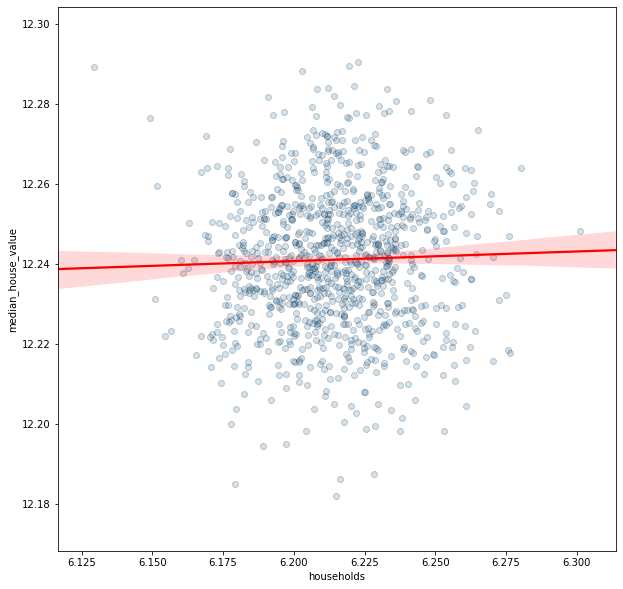

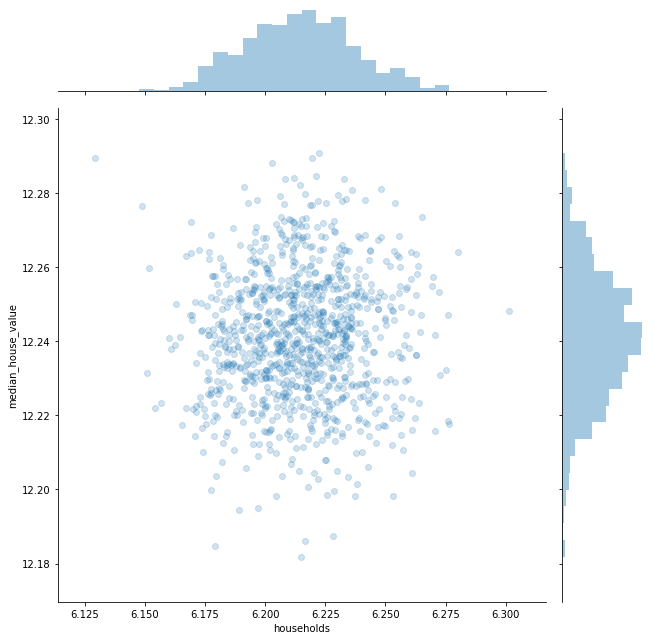

In [76]:
# x_in = np.log(cali_housing_df.households)
# y_in = np.log(cali_housing_df.median_house_value)

x_in = np.log(sample_df.households)
y_in = np.log(sample_df.median_house_value)


fig, ax = plt.subplots(figsize=(10,10))
# ax = sns.residplot(x_in, y_in, color='r', scatter_kws={'alpha':0.2}, dropna=True)
ax = sns.regplot(x_in, y_in, scatter_kws={'alpha':0.2, 'edgecolor':'k'}, line_kws={'color':'r'})


sns.jointplot(x_in, y_in, height=9, alpha=0.2)
plt.show()



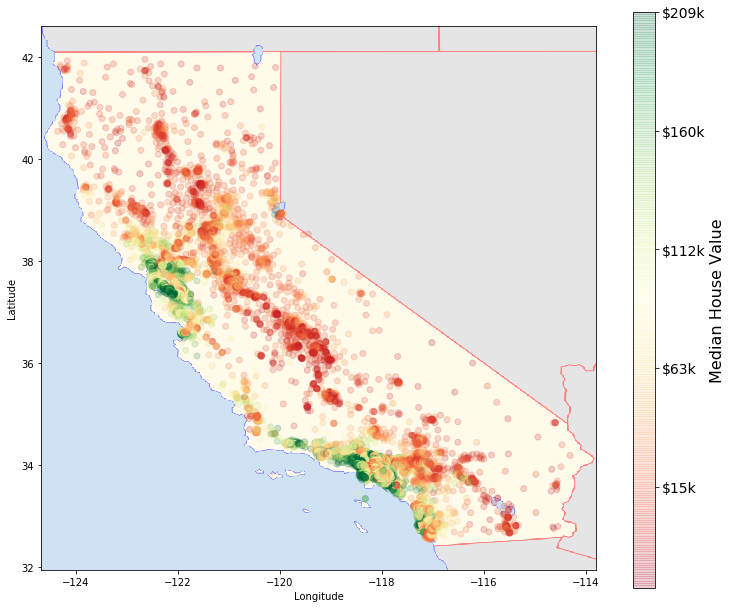

In [12]:
# create fig, axes
fig, ax = plt.subplots(figsize=(10,10))

# force equal aspect ratio
ax.set_aspect('equal')

# get coordinate
lat = cali_housing_df["latitude"]
long = cali_housing_df["longitude"]

# get coloration for house value
coloring = cali_housing_df.median_house_value

# create scatterplot
house_val = ax.scatter(long, lat, c=coloring, cmap='RdYlGn', alpha=0.2)

# create x,y labels
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")

# set axes for colorbar
caxes = fig.add_axes([0.95, 0.1, 0.03, 0.8]) 
cbar = fig.colorbar(house_val, cax=caxes, orientation='vertical')
cbar.set_label("Median House Value", fontsize=16)

# set colorbar ticks
prices = cali_housing_df.median_house_value
tick_values = np.linspace(prices.min(), prices.max(), 11)
cbar.ax.set_yticklabels(["$%dk"%(round(v/1000)) for v in tick_values], fontsize=14)

# overlay outline of California
xlim = ax.get_xlim()
ylim = ax.get_ylim()
im = plt.imread("Images/cali_outline.png")
implot = ax.imshow(im, extent=[-124.68, -113.80, 31.95, 42.60], alpha=0.5)

# save image
# plt.savefig("Images/cali_house_value.png")

# show plot
plt.show()
